<a href="https://colab.research.google.com/github/Reena0202/Repo-1/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub
from imblearn.over_sampling import RandomOverSampler

In [67]:
df = pd.read_csv("diabetes.csv")


In [56]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [66]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns = df.columns)


In [72]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns = df.columns)

In [79]:
len(transformed_df[transformed_df['Outcome'] == 1]), len(transformed_df[transformed_df['Outcome'] == 0])

(500, 500)

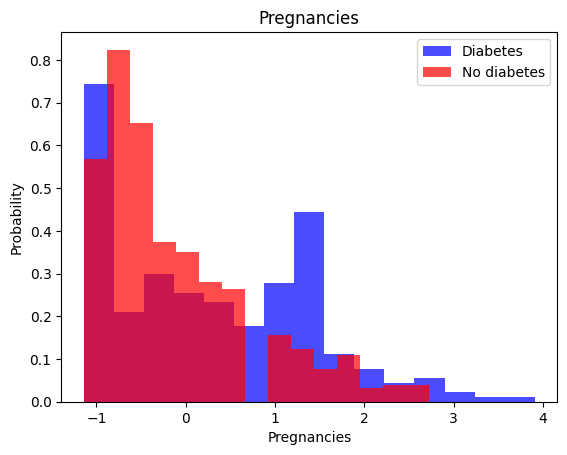

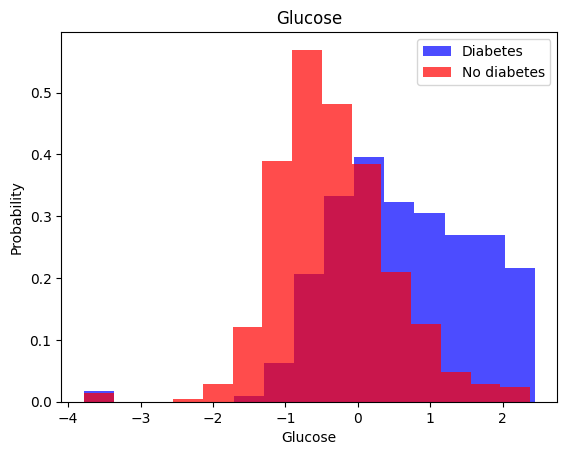

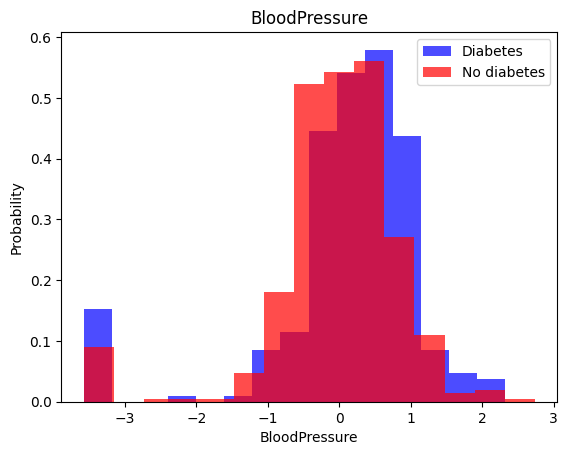

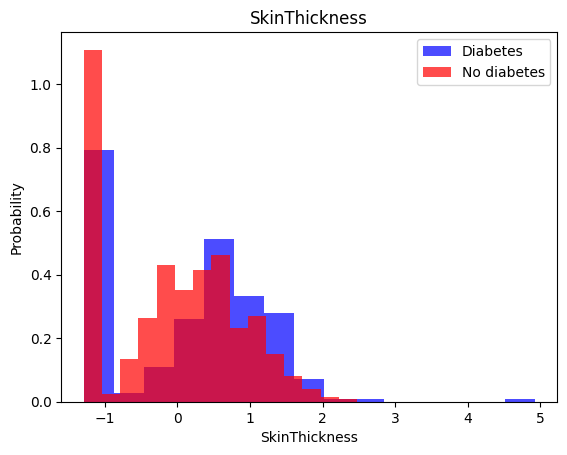

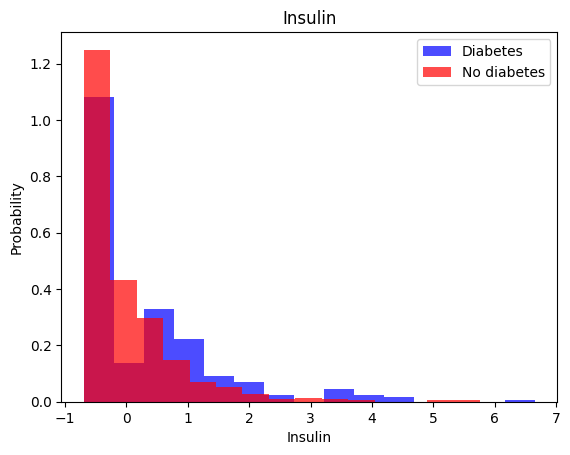

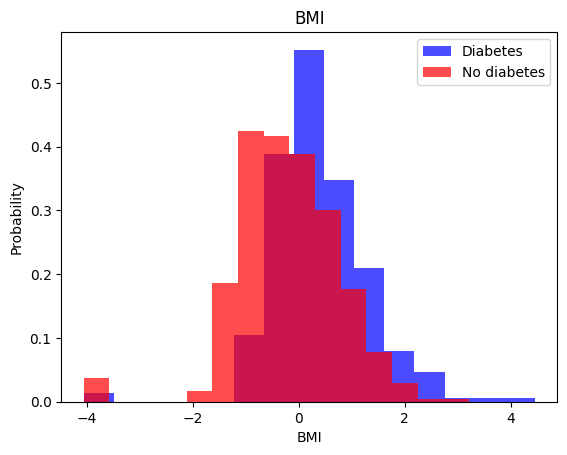

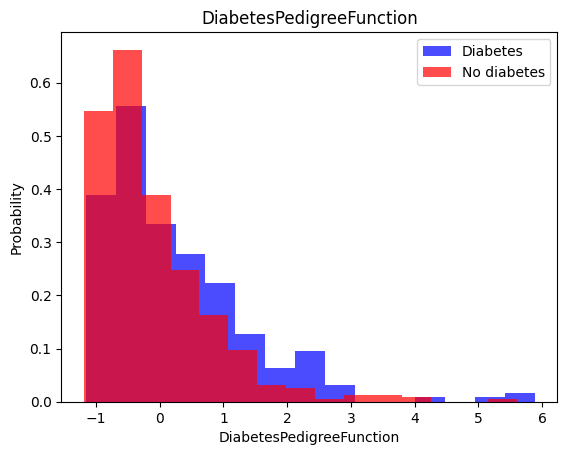

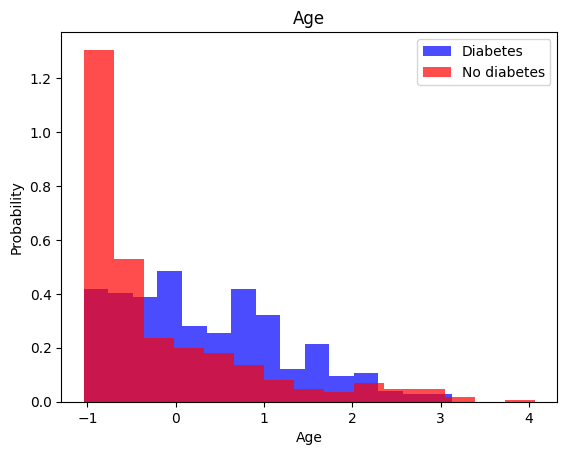

In [68]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color = 'blue', label = 'Diabetes', alpha = 0.7, density = True, bins = 15)
  plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color = 'red', label = "No diabetes", alpha = 0.7, density = True, bins = 15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


In [73]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state = 0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state = 0)

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [80]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [81]:
model.evaluate(x_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7597 - loss: 0.5464  


[0.5497861504554749, 0.7616666555404663]

In [82]:
model.evaluate(x_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7783 - loss: 0.5570 


[0.5413020849227905, 0.7850000262260437]

In [83]:
model.fit(x_train, y_train, batch_size=16, validation_data = (x_valid, y_valid), epochs = 20)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7273 - loss: 0.5719 - val_accuracy: 0.7750 - val_loss: 0.5380
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7625 - loss: 0.5424 - val_accuracy: 0.7850 - val_loss: 0.5349
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7703 - loss: 0.5256 - val_accuracy: 0.7800 - val_loss: 0.5330
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.5635 - val_accuracy: 0.7900 - val_loss: 0.5300
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7585 - loss: 0.5487 - val_accuracy: 0.7850 - val_loss: 0.5279
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7702 - loss: 0.5464 - val_accuracy: 0.7850 - val_loss: 0.5258
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7740 - loss: 0.5290 - val_accuracy: 0.7900 - val_loss: 0.5240
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7734 - loss: 0.5373 - val_accuracy: 0.7750 - val_loss:

In [84]:
model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8068 - loss: 0.4909


[0.5323823690414429, 0.7699999809265137]